
 # Objetivo del laboratorio
 El objetivo de la presenta práctica es conocer el estándar de simulación de circuitos [SPICE](http://bwrcs.eecs.berkeley.edu/Classes/IcBook/SPICE) y realizar pequeñas simulaciones en corriente continua con el mismo. SPICE es una forma elegante y sencilla de codificar circuitos eléctricos de manera que puedan ser procesados por un ordenador. Mediante un sencillo lenguaje podemos definir resistencias, fuentes de alimentación, etc., las conexiones entre ellos y los resultados que deseamos obtener.

 # El estándar SPICE
 **SPICE** es una abreviabiación de *Simulation Program with Integrated Circtuit Emphasis*.
 Se trata básicamente de un método estándar para describir circuitos usando texto plano en
 lugar de una representación gráfica (o *esquemática*). A esta descripción en texto se
 la llama también **netlist** y básicamente se corresponde con la *lista* de los componentes del circuito y cómo estos están conectados entre sí, es decir, de los nodos de unión.
 Los ficheros netlist pueden tener extensiones `.cir`, `.net`, `.ckt`, ó `.sp` y es muy común encontrárselos con cualquiera de estas.

 Existen en el mercado muchas variantes (intérpretes) de Spice, aunque el original fue descrito
 en la Universidad de Berkeley. En la lista de intérpretes de Spice tenemos desde esfuerzos y proyectos comerciales hasta *open source* y regidos por distintas comunidades de usuarios y programadores.

> **Pregunta:** Enumera todos los intérprete de Spice que puedas encontrar. Crea una tabla en Markdown con varias columnas (para el nombre, fabricante, versión actual, licencia y alguna característica sobresaliente). Aquí tienes un ejemplo del que puedes partir y seguir completando:

| Intérprete | Licencia | Fabricante         | Características  |
| ---------- | -------- | ------------------ | ---------------- |
| Ahkab      | GPL      | Giuseppe Venturini | Basado en Python |
|Multisim|     Pago     |National Instruments|   Utilizado par alectrónica de potencia, analógica y digital. En educación e investigación.               |
Electric Circuit Studio|Ambas| ECStudio System|Aplicación móvil|
McCAD 3 SPICE | Free|3SPICE|Permite simulaciones muy rápidas. Basado en Berkeley's SPICE 3|
LT SPICE | Free|ANALOG DEVICES|Spice 3 simulator. |
Oregano|Free/Open Source| Marc Lorber|Simulador de circuitos de Berkeley, Spice o GNUcap|


 > **Pregunta:** ¿Qué comparación puedes efectuar entre C y Spice como estándares (lenguajes) y sus respectivas implementaciones en software? ¿Qué implementaciones reales (compiladores) del lenguaje C conoces?  
 
 >C es un lenguaje de propósito general, no como spice, como veremos más abajo, Spice maneja unidades (k, f, p, n...) mientras que C maneja datos.
 Algunos compiladores de C son: Dev-C++, Visual Age, Clang, DJGPP, GNU Compiller, Intel C++ Compiler o Portable C Compiler.
 ## Elementos de un netlist
 Como acabamos de comentar, un netlist se corresponde con la codificación de los elementos electrónicos de un circuito y las uniones entre los mismos. Veamos con más concreción qué partes y secciones lo componen.

 ## Comentarios

 La primera línea de un netlist se corresponderá siempre con un comentario. A partir de esta línea se pueden introducir más comentarios pero tienen que ir siempre precedidos de un `*`. Ejemplo:
 
 ```spice
 Mi primer circuito
 * Otro comentario
 * más comentarios
 *
 ```

 ## Dispositivos básicos de un circuito
 Los elementos de un netlist son los mismos que encontramos en cualquier circuito eléctrico sencillo,
 tales como resistencias, **condensadores**, **bobinas**, **interruptores**, **hilos** y **fuentes** de alimentación.
 Para distinguir uno de otro, se reserva una letra característica: `V` para fuentes de alimentación, `R` para resistencias, `C` para condensadores y `L` para bobinas. También es posible usar estas letras en su versión en minúscula (`r`, `v`, `c`, `l`, etc.).
 Después de esta letra característica se puede sufijar cualquier texto para diferenciar un elemento de otro (números, letras, palabras, etc.). Ejemplo:

 ```
 * Una resistencia
 R1
 *  Otra resistencia
 R2
 * Fuente de alimentación
 V
 * Un condensador
 Cprincipal
 ```

 ## Conexiones
 A continuación de indicar el elemento eléctrico, tenemos que informar a Spice cuáles
 son los puntos de unión tanto a un lado como al otro del elemento.
 Así es como Spice sabe qué está conectado a qué: porque comparten un **punto**
 (o **nodo**, aunque este término se reserva sobretodo a uniones de más de dos elementos)
 que hemos señalizado correctamente. Para nombrar nodos, lo mejor es emplear una
 numeración secuencial: 0...n. **La enumeración de los puntos de unión es completamente
 a nuestro criterio**.

 ```
 * Una resistencia
 * entre cables 0 y 1
 R1 0 1
 ```

 **Sólo es necesario seguir un criterio**: en el caso de una
 fuente de alimentación, el nodo que pondremos primero será
 aquel que está más cerca del *borne* positivo. Ejemplo:

 ```spice
 * Para una fuente indicamos primeramente conexión a nodo positivo.
 v 2 3 type=vdc vdc=1
 ```
 
En el *caso de LTspice* no es necesario indicar los parámetros `type=vdc` y `vdc=X`, sino que si no se especifica nada, se supone que el último valor es el del voltaje a corriente continua:

```spice
* Especificación de una fuente de alimentación de 10 V en corrient continua en el caso de LTspice
v 0 1 10
```

Aquí tienes un ejemplo gráfico de los componentes comentados justo arriba (resistencia y voltaje):

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencia%20y%20pila%20con%20nodos.svg?sanitize=true)

 ## Unidades en SPICE

 Las unidades de las magnitudes características del circuito son siempre [unidades
 del Sistema Internacional](https://en.wikipedia.org/wiki/SI_electromagnetism_units) y no es necesario indicarlo explícitamente en el netlist.

 La forma de especificar múltiplos de estas cantidades es añadiendo una letra.
 Básicamente las que nos interesan y las que suelen aparecer mayoritariamente son `k` para "kilo-," `m` para "mili?" y `u` para "micro?".

 > **Pregunta:** Crea una tabla en Markdown con todos los prefijos de múltiplos que puedas, su abreviatura y su equivalencia numérica.  
 
Símbolo|Exponente|Magnitud|
--|--|--|
F|10^-15|femto|
P|10^-12|pico|
N|10^-9|nano|
u|10^-6|micro|
m|10^-3|mili|
k|10^3|kilo|
meg|10^6|mega|
g|10^9|giga|
t|10^12|tera|


 En el caso de las fuentes de alimentación hemos de especificar si se trata de corriente contínua (`vdc`) o alterna (`ac`).

 ```
 * Una resistencia de 5 Ohmios
 R2 1 0 5
 * Una pila de 10 Voltios (continua)
 V1 1 0 type=vdc vdc=10
 * Una resistencia de 5 kΩ
 RX 2 4 5k
 ```

 > **Pregunta**: ¿qué unidades del Sistema Internacional relacionadas con la asignatura –y los circuitos en general– conoces? Responde aquí mismo en una celda de Markdown con una tabla.
 
Magnitud medida|Unidad S.I. |Símbolo  | 
-- | --|--|
Longitud|metro|m|
Masa|kilogramo|kg|
Tiempo|segundo|s|
Corriente eléctrica |amperio|A|
Temperatura|kelvil|k|
Carga eléctrica|culombio|C|
Tensión eléctrica|voltio|V|
Resistencia eléctrica|ohmnio|Ω|
Campo magnético |tesla |T|  


 ## Valores iniciales

 Aparecen justo al final de la definición del componente (`ic`). Suelen aplicarse principalmente con condensadores.

 ```
 * Una condensador inicialmente no cargado
 c 1 0 1u ic=0
 ```

 ## Fin del circuito

 El fin de la descripción de un netlist se especifica mediante el
 comando `.end`.

 ```spice
 * Mi primer circuito
 V 1 0 vdc=10 type=vdc
 R 1 0 5
 * Fin del circuito
 .end
 ```


 ## Comandos SPICE para circuitos en corriente continua

 Además de la descripción del circuito, hemos de indicar al intérprete de Spice qué
 tipo de análisis queremos realizar en sobre el mismo y cómo queremos presentar
 la salida de la simulación. Los comandos en Spice empiezan por un `.` y suelen
 escribirse justo al final del circuito, pero antes del comando `.end`.

 ```
  Mi primer circuito
 * Aquí van los componentes
 R 1 0 6k
 ...
 * Comandos
 .op
 ...
 * Fin del circuito
 .end
 ```

 > **Pregunta**: Hasta lo que has visto del lenguaje Spice, ¿dentro de qué tipo o conjunto de lenguajes encajaría? ¿Funcionales? ¿Específicos de dominio? ¿Procedurales? ¿Estructurados? ¿Orientado a Objetos ¿Funcionales? Justifica tu respuesta.  

>Específico de dominio, ya que se utiliza en un entorno muy específico el cual son los circuitos eléctricos y sus simulaciones.

 Veamos los principales comandos de simulación:

 - `.op` es el comando más sencillo que podemos emplear en. Devuelve el voltaje e intensidad en cada ramal y componente del circuito. Este comando no necesita parámetros.
 - `.dc` es uy parecido al comando `.op` pero nos permite cambiar el valor del voltaje de una fuente de alimentación en pasos consecutivos entre el valor A y el valor B.
 En el caso de que la fuente tuviera asignada ya un valor para su voltaje, este sería ignorado. Ejemplo:


 ```spice
 * Variamos el valor del voltaje
 * de la fuente "v" de 1 a 1000
 * en pasos de 5 voltios
 v 1 0 type=vdc vdc=10
 .dc v 1 start=1 stop=1000 step=20
 v2a 2 4 type=vdc vdc=9
 * Igual para v2a. Se ignora su voltaje de 9V
 .dc v2a start=0 stop=10 step=2
 ```

 - El comando `.tran` realiza un análisis en el tiempo de los parámetros del
 circuito. Si no se emplea la directiva `uic` (*use initial conditions*) o esta es igual a cero, este análisis se realiza desde el punto estable de funcionamiento del circuito hasta un tiempo `tfinal`.
 y en intervalos `tstep`. Si empleamos un varlor distinto para parámetro `uic`,
 entonces se hará uso de las condiciones iniciales definidas para cada componente
  (típicamente `ic=X` en el caso de los condensadores, que da cuenta de la carga incial que estos pudieran tener).


 ```
 * Hacemos avanzar el tiempo entre
 * tinicial y tfinal en pasos tstep
 .tran tstart=X tstop=Y tstep=Z uic=0/1/2/3
 ```

 `X`, `Y` y `Z` tienen, evidentemente unidades de tiempo en el S.I. (segundos).

 > **Pregunta**: El parámetro `uic` puede tener varios valores y cada uno significa una cosa. Detállalo usando un celda Markdown y consultando la [documentación de Ahkab](https://buildmedia.readthedocs.org/media/pdf/ahkab/latest/ahkab.pdf).  
 
  > UIC(Use Initial Conditions): Se utiliza para especificar el estado del circuito en t=tstart.
  
   |Valores de UIC|Significado|
  | ---------- | -------- |
  |0|Todos los valores de voltaje a través del circuito son 0 en t=tstart|
  |1|El resultado de t=start es el resultado de una operación .op|
  |2|El resultado de t=start es el ultimo resultado .op donde se toman los valores de ic. Se recomienda verificar los resultados ya que puede dar lugar a error|
  |3|Carga un usuario ic suministrado. Requiere un directorio ic|

 ## Intérprete SPICE que vamos a usar: Ahkab
 Tras un estándar siempre hay una o varias implementaciones. Ahkab no deja de ser una implmentación más en Python del estándar Spice.
 > **Pregunta:** Comenta las distintas implementaciones de lenguajes y estándares que conozcas. Hazlo usando una tabla en Markdown. [Aquí](https://www.markdownguide.org/extended-syntax/#tables) tienes un poco de ayuda (aunque antes ya se ha puesto el ejemplo de una tabla).  
 
 |Implementación|Lenguaje|
 |--|--|
 |CPython|Python|
 |IronPython|Python|
 |Jython|Python|
 |Psyco|Python|
 |PyPy|Python|
 |OpenJDK|Java|
 |IcedTea|Java|
 |JNode|Java|
 
 > **Pregunta:** Describe brevemente este software (creador, objetivos, versiones, licencia, características principales, dependencias, etc.).
 
  > Es un simulador de SPICE de circuitos electrónicos escrito en Python.  
 El creador de este software es Giuseppe Venturini, con ayuda de Ian Daniher, Rob Crowther y  KOLANICH. Quien hace el mantenimiento es Ian Daniher.  
 La licencia es GPL (General Public License)   
 La versión actual es 0.18  
 # Trabajo práctico
 Muy bien, ahora toca definir circuitos y ejecutar simulaciones sobre los mismos gracias a Ahkab.
 ## Instalación de bibliotecas necesarias
 Si estás utilizando Anaconda, asegúrate de tener su entorno activado:
 
 ```cmd
 C:\> conda activate base (en el caso de Windows)
 ```
 ó

 ```bash
 $ source /usr/local/Caskroom/miniconda/base/bin/activate (en el caso de macOS)
 ```

 En el caso de Windows tienes que tener en el PATH el directorio donde se encuentre el comando `conda` (visita la sección de [Environment Variables](https://superuser.com/questions/949560/how-do-i-set-system-environment-variables-in-windows-10) del [Panel de Control](https://www.digitalcitizen.life/8-ways-start-control-panel-windows-10)). Si has instalado Anaconda con [esta opción](https://docs.anaconda.com/_images/win-install-options.png) marcada, ya no tienes que preocuparte por ello. 

 Ahora ya puedes instalar Ahkab:

 ```
 (base) $ pip install ahkab
 ```

 Como siempre, una vez instalado cualquier framework para Python, ya lo podemos utilizar, tanto desde el [REPL](https://en.wikipedia.org/wiki/Read–eval–print_loop) como desde un entorno Jupyter (Jupyter, [Jupyterlab](http://jupyterlab.readthedocs.io/en/stable/), VS Code o nteract). Recuerda que para usar el kernel Python (que viene con Anaconda) desde nteract debes seguir las instrucciones que se indican en su [documentación oficial](https://nteract.io/kernels).  

In [2]:
import pylab as plt
import ahkab

También vamos a importar Sympy para hacer algún cálculo más *manual* más adelante:

In [2]:
import sympy.physics.units as u
from sympy.physics.units import Dimension 
from sympy import * 
from sympy.physics.units import convert_to


 > **Pregunta:** ¿Qué es y para qué sirve PyLab?  
 
 >Un conjunto de librerías de Python en las que se incluye numpy, scipy, sympy, pandas, matplotlib, ipython.
Sirve para manipular magnitudes y datos y crear gráficas (en el caso de esta práctica).

 ## Circuitos sencillos para trabjar con la ley de Ohm:

 La *mal llamada* ley de Ohm reza que el voltaje (la *energía por unidad de carga*) que se disipa en un tramo de un circuito eléctrico es equivalente a la intensidad ($I$) de la corriente (es decir, cuántos electrones circulan por unidad de tiempo) por la resistencia del material ($R$) en el que está desplazándose dicha corriente. Matemáticamente:

 $$
 V = I\cdot R
 $$

 > **Pregunta:** comprueba que la ecuación anterior está ajustada a nivel dimensional, es decir, que la naturaleza de lo que está a ambos lados del signo igual es la misma. Realiza este ejercicio con LaTeX en una celda Markdown.  
 
  
  $$V = I\cdot R$$  
  Sabemos que:
  $$V= \frac{kg \cdot m^2}{A \cdot s^3}$$
  y
  $$R= \frac{m^2 \cdot kg}{s^3 \cdot A^2}$$
  Sustituimos en la ecuación
  $$\frac{kg \cdot m^2}{A \cdot s^3} = I \cdot \frac{m^2 \cdot kg}{s^3 \cdot A^2} $$
  Despejando en la ecuación nos queda
  $$ \frac{kg \cdot m^2 \cdot s^3 \cdot A^3}{kg \cdot m^2 \cdot s^3 \cdot A} = I $$
  Simplificando vemos que la ecuación está ajustada a nivel dimensional.
  $$A = I$$
 

 Comencemos con el circuito más sencillo posible de todos:

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/primer%20circuito.svg?sanitize=true)

 Vamos a escribir su contenido (componentes o *netlist*) en disco con el nombre `circuito sencillo.sp`. Esto lo podemos lograr directamente y en tiempo real desde una celda de Jupyter gracias a los *comandos mágicos* de este entorno de programación literaria. En concreto vamos a utilizar `%%writefile` que guarda los contenidos de una celda como un fichero. 

In [3]:
%%writefile "circuito sencillo.sp"
* Este es un circuito sencillo
r1 1 0 100
v1 0 1 type=vdc vdc=9
.op
.dc v1 start=0 stop=9 step=1
.end


Overwriting circuito sencillo.sp


Ahora vamos a leer su descripción con Ahkab, interpretar y ejecutar las simulaciones que en él estén descritas.

In [4]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('circuito sencillo.sp')

 Separamos la información del netlist (componentes) de los análisis (uno de tipo `op` y otro de tipo `dc`):

In [5]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
print(lista_de_análisis)


[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN'}]


> **Pregunta:** ¿qué tipo de estructura de Python es `lista_de_análisis`?  

>Una lista de diccionario, es decir un conjunto no ordenado de pares clave:valor. Las claves deben ser únicas.


>Las simulaciones que implican listas de datos (`.dc`, `.tran`, etc.) necesitan de un fichero temporal (`outfile`)
 donde almacenar los resultados. Para ello tenemos que definir la propiedad `outfile`.

In [6]:
lista_de_análisis[1]['outfile'] = "simulación dc.tsv"


 > **Pregunta:** escribe el código Python necesario para identificar qué análisis de `lista_de_análisis`
 son de tipo `dc` ó `tran` y sólo añadir la propiedad `outfile` en estos casos.
Aquí tenéis un post de Stackoverflow con algo de [ayuda](https://stackoverflow.com/questions/49194107/how-to-find-index-of-a-dictionary-key-value-within-a-list-python).
 Un poco más de ayuda: el siguiente código (sí, una única línea) devuelve el índice de la simulación que es de tipo `dc`. Para simplificar un poco el ejercicio, suponed que, como máximo, habrá un análisis de tipo `tran` y/o `dc`.

In [7]:
#[i for i, d in enumerate(lista_de_análisis) if "dc" in d.values() or "tran" in d.values()][0]
for d in lista_de_análisis:
    if d['type'] == 'dc':
        d['outfile'] = 'simulacion_dc_'+d['source']+'.tsv'
        print(d['outfile'])
    elif d['type'] == 'tran':
        d['outfile'] = 'simulacion_tran_'+d['source']+'.tsv'
        print(d['outfile'])

simulacion_dc_v1.tsv


Una vez que ya hemos separado netlists de simulaciones, ahora ejecutamos las segundas (¡todas a la vez!) gracias al método `.run` de Ahkab: 

In [8]:
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting DC analysis:
Solving...  done


### Resultados de la simulación `.dc`
Imprimimos información sobre la simulación de tipo `.dc`:

In [9]:
print(resultados['dc'])

<DC simulation results for '* este es un circuito sencillo' (netlist circuito sencillo.sp). LIN sweep of V1 from 0 to 9 V. Run on 2019-12-18 18:55:55, data file simulacion_dc_v1.tsv>


 Veamos qué variables podemos dibujar para el caso del análisis `dc`.

In [10]:
print(resultados['dc'].keys())

['V1', 'V1', 'I(V1)']


Y ahora graficamos el resultado del análisis anterior. Concretamente vamos a representar el voltaje en el borne 1 (`V1`) con respecto a la intensidad del circuito (`I(V1)`).

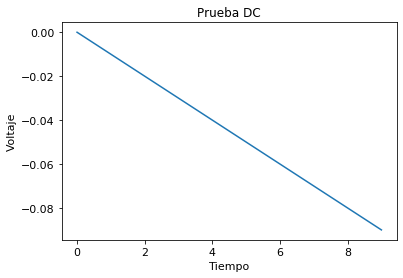

In [11]:
figura = plt.figure()
plt.title("Prueba DC")
plt.xlabel('Tiempo')
plt.ylabel('Voltaje')
plt.plot(resultados['dc']['V1'], resultados['dc']['I(V1)'], label="Voltaje (V1)")

> **Pregunta:** comenta la gráfica anterior… ¿qué estamos viendo exactamente? Etiqueta los ejes de la misma convenientemente. Así como ningún número puede *viajar* solo sin hacer referencia a su naturaleza, ninguna gráfica puede estar sin sus ejes convenientemente etiquetados. Algo de [ayuda](https://matplotlib.org/3.1.0/gallery/pyplots/fig_axes_labels_simple.html). ¿Qué biblioteca estamos usando para graficar? Una [pista](https://matplotlib.org).

>El paso de la corriente en cada instante de tiempo.  
La biblioteca es matplot

 ### Resultados de la simulación `.op` 
 El método `.results` nos devuelve un diccionario con los resultados de la simulación.

In [12]:
print(resultados['op'].results)

{V1: -9.0, I(V1): -0.09}


 > **Pregunta:** justifica el sencillo resultado anterior (análisis `op`). Repite el cálculo con Sympy, atendiendo con mimo a las unidades y al formateo de los resultados (tal y como hemos visto en muchos otros notebooks en clase).

In [13]:
v1 = 9*u.volts
r1 = 100*u.ohms
intensidad = u.Quantity('i')
intensidad.set_dimension(u.current)
ley_ohm = Eq(v1, intensidad*r1)
solucion_para_intensidad = solve(ley_ohm, intensidad)
pprint(convert_to(solucion_para_intensidad[0], [u.ampere]).n(2))

0.09⋅ampere


 ## Análisis de circuito con resistencias en serie

Vamos a resolver (en punto de operación) el siguiente circuito:

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20serie.svg?sanitize=true)

Al igual que antes, grabamos el netlist en disco desde Jupyter gracias a la *palabra mágica* [`%writefile`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile). 

In [14]:
%%writefile "resistencias en serie.net"
* circuito con tres resistencias en serie
v1 1 0 type=vdc vdc=9
R1 0 2 3k
R2 2 3 10k  
R3 3 1 5k
* análisis del circuito
.op
.end

Overwriting resistencias en serie.net


In [15]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en serie.net')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimos los resultados del análisis `.op`:

In [16]:
print(resultados['op'])

OP simulation results for '* circuito con tres resistencias en serie'(netlist resistencias en serie.net).
Run on 2019-12-18 18:55:56, data file None.
Variable    Units      Value     Error    %
----------  -------  -------  --------  ---
V1          V         9       -9e-12      0
V2          V         1.5     -1.5e-12    0
V3          V         6.5     -6.5e-12    0
I(V1)       A        -0.0005   0          0


Los cantidades `V1`, `V2` y `V3` hacen referencia a los distintos valores del potencial que se ha perdido en cada uno de los bornes que has elegido para describir el netlist (`1`, `2`, etc.). Por ejemplo, podemos calcular el *potencial consumido* por la resistencia `R1` y verás que coincide con el del punto `V2` devuelto por Ahkab. 

In [17]:
r1 = 3E3*u.ohms
intensidad_ahkab = resultados['op']['I(V1)'][0][0]*u.ampere
v2 = convert_to(intensidad_ahkab*r1, [u.volt])
pprint(v2)

-1.5⋅volt


 > **Pregunta**: reproduce el resto de los valores anteriores de manera *manual* mediante Sympy (es decir, aplicando la ley de Ohm, pero con tun *toque computacional*). Te pongo aquí un ejemplo del que puedes partir… En él sólo calculo la corriente que circula por el circuito (sí, justo la que antes Ahkab ha devuelto de manera automática). Para ello necesito previamente computar la resistencia total (`r_total`). Faltarían el resto de resultados y convertirlos a unidades más *vistosas* (mediante la orden `convert_to` y `.n()`).

In [18]:
v1 = 9*u.volts
r1 = 3*u.kilo*u.ohms
r2 = 10*u.kilo*u.ohms
r3 = 5*u.kilo*u.ohms
r_total = r1 + r2 + r3
intensidad = u.Quantity('i')
intensidad.set_dimension(u.current)
ley_ohm = Eq(v1, intensidad*r_total)
solucion_para_intensidad = solve(ley_ohm, intensidad)
pprint(convert_to(solucion_para_intensidad[0], [u.ampere]).n(2))

0.0005⋅ampere


In [19]:
v1 = 9*u.volts
r1 = 3*u.kilo*u.ohms
r2 = 10*u.kilo*u.ohms
r3 = 5*u.kilo*u.ohms
r_total = r1 + r2 + r3
intensidad = 0.0005*u.amperes
ley_ohm = Eq(v1, intensidad*r_total)
solucion_para_v1 = solve(ley_ohm, v1)
pprint(convert_to(solucion_para_v1[0], [u.volts]).n(2))

9.0⋅volt


In [20]:
v1 = 9*u.volts
r1 = 3*u.kilo*u.ohms
r_total = r1
intensidad = 0.0005*u.amperes
ley_ohm = Eq(v1, intensidad*r_total)
solucion_para_v1 = solve(ley_ohm, v1)
pprint(convert_to(solucion_para_v1[0], [u.volts]).n(2))

1.5⋅volt


In [21]:
v1 = 9*u.volts
r1 = 3*u.kilo*u.ohms
r2 = 10*u.kilo*u.ohms
r_total = r1 + r2
intensidad = 0.0005*u.amperes
ley_ohm = Eq(v1, intensidad*r_total)
solucion_para_v1 = solve(ley_ohm, v1)
pprint(convert_to(solucion_para_v1[0], [u.volts]).n(2))

6.5⋅volt


> **Pregunta**: Demuestra que se cumple la Ley de Kirchhoff de la energía en un circuito, es decir, que la suma de la energía suministrada por las fuentes (pilas) es igual a la consumida por las resistencias. Realiza la operación con Sympy.

$$
\sum_i^N V_{\text{fuentes}} = \sum_j^M V_{\text{consumido en resistencias}}
$$

Ten en cuenta que en este caso sólo hay una fuente.

In [22]:
r2 = 10E3*u.ohms
intensidad_ahkab = resultados['op']['I(V1)'][0][0]*u.ampere
v3 = convert_to(intensidad_ahkab*r2, [u.volt])
pprint(v3)

-5.0⋅volt


In [23]:
r3 = 5E3*u.ohms
intensidad_ahkab = resultados['op']['I(V1)'][0][0]*u.ampere
v4 = convert_to(intensidad_ahkab*r3, [u.volt])
pprint(v4)

-2.5⋅volt


In [24]:
print("tensión fuente =",v1)

tensión fuente = 9*volt


In [25]:
print("tensión en r1 =",v2)
print("tensión en r2 =",v3)
print("tensión en r3 =",v4)
v_total = v2 + v3 + v4
print("\nLa tensión total consumida en las resistencias es de",v_total)

tensión en r1 = -1.5*volt
tensión en r2 = -5.0*volt
tensión en r3 = -2.5*volt

La tensión total consumida en las resistencias es de -9.00000000000001*volt


>Ya tenemos las dos partes de la igualdad.  
Como tenemos la tensión inicial, la cual es 9 Voltios, la tensión inicial es igual a la tensión en las resistencias.  
Se cumple la Ley de Kirchhoff

## Análisis `.op` de circuitos con resistencias en paralelo

Vamos a complicar un poco el trabajo añadiendo elementos en paralelo.

 > **Pregunta**: realiza los análisis `.op` de los siguientes circuitos.
 Para ello crea un netlist separado para cada uno donde queden correctamente descritos
 junto con la simulación (`.op`). Comenta los resultados que devuelve Ahkab (no imprimas los resultados de las simulaciones *sin más*).

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20paralelo.svg?sanitize=true)

 Aquí tienes el análisis del primer circuito, para que sirva de ejemplo:

## Nota importante, en el primer circuito, hay dos resistencias que se llaman R2, tomaremos siempre R de 470 ohmnios como R5

In [26]:
%%writefile "resistencias en paralelo 1.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
r2 1 2 1k
r3 2 3 220
r4 3 0 1.5k
r5 2 0 470
.op
.end

Overwriting resistencias en paralelo 1.cir


In [27]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimimos los resultados del análisis `.op`. Como puedes comprobar, Ahkab sólo reporta la intensidad de corriente en las ramas en las que hay una pila (en este caso, la rama donde está la pila `VDD`).

In [28]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 1.cir).
Run on 2019-12-18 18:55:56, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V2          V         -3.23533     3.23532e-12    0
V3          V         -2.8215      2.82151e-12    0
I(VDD)      A         -0.00876467  0              0


In [29]:
%%writefile "resistencias en paralelo 2.cir"
* resistencias en paralelo
v1 0 1 type=vdc vdc=9
v2 0 3 type=vdc vdc=1.5
r1 1 2 47
r2 2 4 220
r3 2 3 180
r4 4 5 1k
r5 5 0 560
.op
.end

Overwriting resistencias en paralelo 2.cir


In [30]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 2.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [31]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 2.cir).
Run on 2019-12-18 18:55:56, data file None.
Variable    Units         Value        Error    %
----------  -------  ----------  -----------  ---
V1          V        -9          8.99994e-12    0
V3          V        -1.5        1.50001e-12    0
V2          V        -7.29441    7.29442e-12    0
V4          V        -6.39285    6.39285e-12    0
V5          V        -2.29487    2.29487e-12    0
I(V1)       A        -0.0362891  0              0
I(V2)       A         0.0321912  0              0


>Como podemos observar, ahkab lo primero que hace es devolver la intensidad de las pilas, de 9 y 1,5V, y después analizar el voltaje al pasar por cada una de las resistencias.  
Nos devuelve la intensidad en cada una de las pilas (I(V1), I(V2)).

In [32]:
%%writefile "resistencias en paralelo 3.cir"
* resistencias en paralelo
v0 0 1 type=vdc vdc=9
v1 0 2 type=vdc vdc=0
v2 0 3 type=vdc vdc=0
v3 0 4 type=vdc vdc=0
r1 2 1 10k
r2 3 1 2k
r3 4 1 1k
.op
.end

Overwriting resistencias en paralelo 3.cir


In [33]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 3.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [34]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 3.cir).
Run on 2019-12-18 18:55:56, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V        -9         9e-12    0
V2          V         0         0        0
V3          V         0         0        0
V4          V         0         0        0
I(V0)       A        -0.0144    0        0
I(V1)       A         0.0009    0        0
I(V2)       A         0.0045    0        0
I(V3)       A         0.009     0        0


>Aquí ahkab nos muestra el valor del voltaje en cada una de las pilas, y vemos que la primera es la única que tiene carga de 9 Voltios.  
Después nos devuelve la intensidad en cada uno de ellos, y si sumamos cada una de ellas (I(V1) + I(V2) + I(V3)) nos da la intensidad V(0), demostrando la Ley de Kirchhoff

> **Pregunta:** inserta dos *pilas virtuales* de 0 voltios en el resto de ramas del circuito (`Vdummy1` en la rama donde está `R5` y `Vdummy2` en la rama donde está `R3` y `R4`) para que Ahkab nos imprima también la corriente en las mismas. Es muy parecido al tercer circuito que tienes que resolver, donde `V1`, `V2` y `V3` tienen cero voltios. Estas *pilas nulas* son, a todos los efectos, *simples cables*. Una vez que ya tienes las corrientes en todas las ramas, comprueba que se cumple la Ley de Kirchhoff para las corrientes:

$$
I_{\text{entrante}} = \sum_i^{N} I_{\text{salientes}}
$$

Repite lo mismo para los otros dos circuitos. Realiza además los cálculos con Sympy (recalcula los mismos voltajes que devuelve Ahkab a partir de la corriente que sí te devuelve la simulación) y cuidando de no olvidar las unidades. Recuerda que el objeto `resultados` alberga toda la información que necesitas de manera indexada. Ya han aparecido un ejemplo más arriba. Es decir: no *copies* los números *a mano*, trabaja de manera informáticamente elegante (usando la variable `resultados`). 

In [35]:
%%writefile "resistencias en paralelo maspilas.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
v1 2 5 type=vdc vdc=0
v2 4 0 type=vdc vdc=0
r2 1 2 1k
r3 2 3 220
r4 3 4 1.5k
r5 5 0 470
.op
.end

Writing resistencias en paralelo maspilas.cir


In [36]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo maspilas.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [37]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo maspilas.cir).
Run on 2019-12-18 18:55:56, data file None.
Variable    Units           Value         Error    %
----------  -------  ------------  ------------  ---
V1          V        -12            1.2e-11        0
V2          V         -3.23533      3.23533e-12    0
V5          V         -3.23533      3.23533e-12    0
V4          V          0           -6.50521e-19    0
V3          V         -2.8215       2.82151e-12    0
I(VDD)      A         -0.00876467   0              0
I(V1)       A         -0.00688367   0              0
I(V2)       A         -0.001881     0              0


In [38]:
intensidad_ahkab = resultados['op']['I(VDD)'][0][0]*u.ampere
intensidad_ahkab2 = resultados['op']['I(V1)'][0][0]*u.ampere
intensidad_ahkab3 = resultados['op']['I(V2)'][0][0]*u.ampere
pprint("La intensidad inicial es")
pprint(intensidad_ahkab)
pprint("La intensidad en cada una de las resistencias es")
pprint(intensidad_ahkab2)
pprint(intensidad_ahkab3)
pprint("Su suma, que como vemos es igual a la intensidad total.")
intensidad_total = intensidad_ahkab2 + intensidad_ahkab3
pprint(intensidad_total)

La intensidad inicial es
-0.00876467449306297⋅ampere
La intensidad en cada una de las resistencias es
-0.00688367129135539⋅ampere
-0.00188100320170758⋅ampere
Su suma, que como vemos es igual a la intensidad total.
-0.00876467449306297⋅ampere


In [39]:
%%writefile "resistencias en paralelo maspilas2.cir"
* resistencias en paralelo
v1 0 1 type=vdc vdc=9
v2 5 1 type=vdc vdc=1.5
v3 2 3 type=vdc vdc=0
r1 0 2 47
r2 3 4 220
r3 2 5 180
r4 4 6 1k
r5 6 1 560
.op
.end

Writing resistencias en paralelo maspilas2.cir


In [40]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo maspilas2.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [41]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo maspilas2.cir).
Run on 2019-12-18 18:55:56, data file None.
Variable    Units          Value        Error    %
----------  -------  -----------  -----------  ---
V1          V        -9           9.00001e-12    0
V5          V        -7.5         7.5e-12        0
V2          V        -1.70559     1.70559e-12    0
V3          V        -1.70559     1.70559e-12    0
V4          V        -2.60715     2.60715e-12    0
V6          V        -6.70513     6.70513e-12    0
I(V1)       A        -0.0362891   0              0
I(V2)       A         0.0321912   0              0
I(V3)       A         0.00409798  0              0


In [42]:
intensidad_ahkab = resultados['op']['I(V1)'][0][0]*u.ampere
intensidad_ahkab2 = resultados['op']['I(V2)'][0][0]*u.ampere
intensidad_ahkab3 = resultados['op']['I(V3)'][0][0]*u.ampere
pprint("La intensidad inicial es")
pprint(intensidad_ahkab)
pprint("La intensidad en cada una de las resistencias es")
pprint(intensidad_ahkab2)
pprint(intensidad_ahkab3)
pprint("Su suma, que como vemos es igual a la intensidad total.")
intensidad_total = intensidad_ahkab2 + intensidad_ahkab3
pprint(intensidad_total)

La intensidad inicial es
-0.0362891496169883⋅ampere
La intensidad en cada una de las resistencias es
0.0321911664888975⋅ampere
0.00409798312809076⋅ampere
Su suma, que como vemos es igual a la intensidad total.
0.0362891496169883⋅ampere


 # Circuitos en DC que evolucionan con el tiempo

 ## Carga de un condensador
 Vamos a ver qué le pasa a un circuito de corriente continua cuando tiene un condensador
 en serie.

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensador%20en%20continua.svg?sanitize=true)

 Al igual que antes, primero guardamos el circuito en un netlist externo:

In [54]:
%%writefile "condensador en continua.ckt"
* Carga condensador
v1 0 1 type=vdc vdc=6
r1 1 2 1k
c1 2 0 1m ic=0
.op
.tran tstep=0.1 tstop=8 uic=0
.end

Overwriting condensador en continua.ckt


> **Pregunta:** ¿qué significa el parámetro `ic=0`? ¿qué perseguimos con un análisis de tipo `.tran`?  

> ic=0 significa el valor inicial del transistor es igual a 0, que no está alterado por nada.  
El análisis .tran analiza paso a paso la carga desde el valor inicial hasta el final yendo paso a paso, en el ejemplo anterior, desde 0.1, sumando 0.1, hasta llegar a 8.

Leamos el circuito:

In [55]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("condensador en continua.ckt")

 Separamos el netlist de los análisis y asignamos un fichero de almacenamiento de datos (`outfile`):

In [56]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[1]['outfile'] = "simulación tran.tsv"

 Ejecutamos la simulación:

In [57]:
resultados = ahkab.run(circuito, lista_de_análisis)
print(resultados['op'])
#print(resultados['tran'].keys())

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.0869565
OP simulation results for '* carga condensador'(netlist condensador en continua.ckt).
Run on 2019-12-18 18:57:38, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V             -6    6e-12    0
V2          V             -6    6e-12    0
I(V1)       A              0    0        0


 Dibujamos la gráfica de carga del condensador con el tiempo, centrándonos en la intensidad que circula por la pila. 

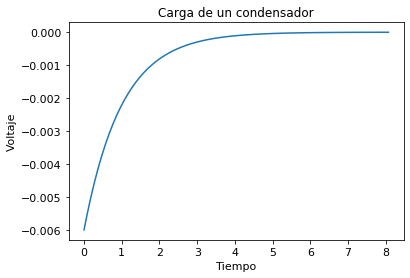

In [58]:
figura = plt.figure()
plt.title("Carga de un condensador")
plt.xlabel('Tiempo')
plt.ylabel('Voltaje')
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1)'], label="Una etiqueta")

> **Pregunta:** Etiqueta los ejes convenientemente y comenta la gráfica. Dibuja otra gráfica con el voltaje en el borne `V1`. ¿Por qué son *opuestas*? ¿Qué le ocurre al voltaje a medida que evoluciona el circuito en el tiempo? Dibuja las gráficas en un formato estándar de representación vectorial (SVG, por ejemplo). Algo de ayuda [aquí](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.set_matplotlib_formats). ¿Qué valores devuelve el análisis de tipo `.op`? Justifícalo.

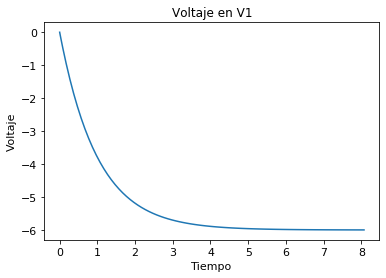

In [60]:
figura = plt.figure()
plt.title("Voltaje en V1")
plt.xlabel('Tiempo')
plt.ylabel('Voltaje')
plt.plot(resultados['tran']['T'], resultados['tran']['V2'])

Las gráficas son opuestas porque mientras el condensador se va cargando la corriente va disminuyendo. Una vez que el condensador se ha cargado por completo la corriente deja de circular

## Carrera de condensadores

Ahora tenemos un circuito con dos condensadores en paralelo: 

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensadores%20en%20paralelo.svg?sanitize=true)

> **Pregunta:** Crea el netlist de este circuito e identifica qué condensador se satura primero. Dibuja la evolución de la intensidad en ambas ramas de manera simultánea. [Aquí](https://matplotlib.org/gallery/api/two_scales.html) tienes un ejemplo de cómo se hace esto en Matplotlib. Recuerda que para que Ahkab nos devuelva la corriente en una rama, debe de estar presente una pila. Si es necesario, inserta pilas virtuales de valor nulo (cero voltios), tal y como hemos comentado antes. Grafica también los voltajes (en otra gráfica, pero que aparezcan juntos). 

In [66]:
%%writefile "carrera de condensadores.ckt"
* Carga condensador
v1 0 1 type=vdc vdc=10
v2 2 3 type=vdc vdc=0
v3 2 4 type=vdc vdc=0
r1 1 2 3.3k
c1 3 0 47u ic=0
c2 4 0 22u ic=0
.op
.tran tstep=0.1 tstop=3 uic=0
.end

Overwriting carrera de condensadores.ckt


In [67]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("carrera de condensadores.ckt")

In [68]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[1]['outfile'] = "carrera tran.tsv"

In [69]:
resultados = ahkab.run(circuito, lista_de_análisis)
print(resultados['op'])
#print(resultados['tran'].keys())

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.0625
OP simulation results for '* carga condensador'(netlist carrera de condensadores.ckt).
Run on 2019-12-18 19:18:59, data file None.
Variable    Units            Value    Error    %
----------  -------  -------------  -------  ---
V1          V        -10              1e-11    0
V2          V        -10              1e-11    0
V3          V        -10              1e-11    0
V4          V        -10              1e-11    0
I(V1)       A          1.25042e-19    0        0
I(V2)       A          0              0        0
I(V3)       A          0              0        0


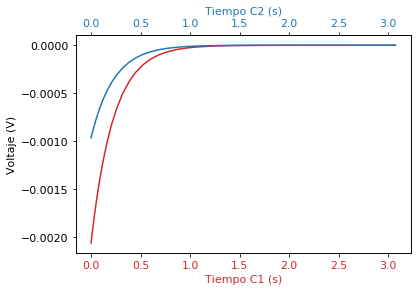

In [71]:
import numpy as np
import matplotlib.pyplot as plt
# Create some mock data
fig, ax1 = plt.subplots()


c1_x = resultados['tran']['T']
c1_y = resultados['tran']['I(V2)']
c2_x = resultados['tran']['T']
c2_y = resultados['tran']['I(V3)']

color = 'tab:red'
ax1.set_xlabel('Tiempo C1 (s)', color=color)
ax1.set_ylabel('Voltaje (V)')
ax1.plot(c1_x, c1_y, color=color)
ax1.tick_params(axis='x', labelcolor=color)

ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_xlabel('Tiempo C2 (s)', color=color)
ax2.plot(c2_x, c2_y, color=color)
ax2.tick_params(axis='x', labelcolor=color)


plt.show()